In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import sklearn
sklearn.__version__

'1.1.2'

In [171]:
# !pip install -U scikit-learn --user

In [3]:
import sklearn
sklearn.__version__

'1.1.2'

In [4]:
datadir = "D:\DataScience-60\AttritionRatePredict"
filename = "Table_1.csv"
filePath  = os.path.join(datadir, filename)
df = pd.read_csv(filePath)

In [277]:
df.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay


In [278]:
df.columns

Index(['table id', 'name', 'phone number', 'Location', 'Emp. Group',
       'Function', 'Gender ', 'Tenure', 'Tenure Grp.', 'Experience (YY.MM)',
       'Marital Status', 'Age in YY.', 'Hiring Source',
       'Promoted/Non Promoted', 'Job Role Match', 'Stay/Left'],
      dtype='object')

In [293]:
new_columns = []
for i in df.columns:
    m = i.strip().replace(" ","_").lower().replace("/", "_").replace(".","").replace("(","").replace(")","")
    new_columns.append(m)
new_columns

['table_id',
 'name',
 'phone_number',
 'location',
 'emp_group',
 'function',
 'gender',
 'tenure',
 'tenure_grp',
 'experience_yymm',
 'marital_status',
 'age_in_yy',
 'hiring_source',
 'promoted_non_promoted',
 'job_role_match',
 'stay_left']

In [296]:
df.columns = new_columns
df.columns

Index(['table_id', 'name', 'phone_number', 'location', 'emp_group', 'function',
       'gender', 'tenure', 'tenure_grp', 'experience_yymm', 'marital_status',
       'age_in_yy', 'hiring_source', 'promoted_non_promoted', 'job_role_match',
       'stay_left'],
      dtype='object')

In [302]:
cat_columns = []
num_columns = []

for i in df.columns:
    if df[i].dtype == object:
   
        cat_columns.append(i)
    else:
        num_columns.append(i)

        
print(cat_columns)
print(num_columns)

['name', 'location', 'emp_group', 'function', 'gender', 'tenure_grp', 'marital_status', 'hiring_source', 'promoted_non_promoted', 'job_role_match', 'stay_left']
['table_id', 'phone_number', 'tenure', 'experience_yymm', 'age_in_yy']


In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   table_id               902 non-null    int64  
 1   name                   902 non-null    object 
 2   phone_number           902 non-null    int64  
 3   location               902 non-null    object 
 4   emp_group              902 non-null    object 
 5   function               902 non-null    object 
 6   gender                 902 non-null    object 
 7   tenure                 902 non-null    float64
 8   tenure_grp             902 non-null    object 
 9   experience_yymm        898 non-null    float64
 10  marital_status         902 non-null    object 
 11  age_in_yy              902 non-null    float64
 12  hiring_source          902 non-null    object 
 13  promoted_non_promoted  902 non-null    object 
 14  job_role_match         900 non-null    object 
 15  stay_l

In [2]:
import yaml
yaml_dir = 'D:\DataScience-60\AttritionRatePredict\configs'
os.path.dirname(yaml_dir)

'D:\\DataScience-60\\AttritionRatePredict'

In [369]:
yaml_dir = 'D:\DataScience-60\AttritionRatePredict\configs'
yaml_file = "schema.yaml"
yaml_path = os.path.join(yaml_dir, yaml_file)
with open(yaml_path, 'rb') as ymalfile:
    y = yaml.safe_load(ymalfile)

for i in y['columns']:
    if y['columns'][i] == df[i].dtype:
        print(i)

table_id
name
phone_number
location
emp_group
function
gender
tenure
tenure_grp
experience_yymm
marital_status
age_in_yy
hiring_source
promoted_non_promoted
job_role_match
stay_left


In [373]:
print(y['categorical_columns'], len(y['categorical_columns']))
print(y['numerical_columns'],len(y['numerical_columns']),"\n")
# print(y['target_column'])

['name', 'location', 'emp_group', 'function', 'gender', 'tenure_grp', 'marital_status', 'hiring_source', 'promoted_non_promoted', 'job_role_match', 'stay_left'] 11
['table_id', 'phone_number', 'tenure', 'experience_yymm', 'age_in_yy'] 5 



In [372]:
len(df.columns)

16

## Coding for modeling

In [7]:
from box import ConfigBox
# !pip install python-box==6.0.2

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.pipeline import Pipeline
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
tt_split = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

pipe = StandardScaler()
ohe = OneHotEncoder()
lec = LabelEncoder()


In [155]:
# df.columns
features_cols = ['table id', 'name', 'phone number', 'Location', 'Emp. Group',
       'Function', 'Gender ', 'Tenure', 'Tenure Grp.', 'Experience (YY.MM)',
       'Marital Status', 'Age in YY.', 'Hiring Source',
       'Promoted/Non Promoted', 'Job Role Match']
target_col = 'Stay/Left'

In [158]:
train_df = tt_split[0].drop(['Stay/Left'], axis=1)
test_df = tt_split[1].drop(['Stay/Left'], axis=1)

target_train_df = tt_split[0][target_col].map(lambda x: 1 if x=='Stay' else 0)
target_test_df = tt_split[1][target_col].map(lambda x: 1 if x=='Stay' else 0)

In [156]:
categorical = []
numerical = []
for i in features_cols:
    if df[i].dtype == object:
        categorical.append(i)
    else:
        numerical.append(i)
        

In [159]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('sclaer', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
    ('scaler', StandardScaler(with_mean=False)),
])

preprocessing = ColumnTransformer([
    ('numerical',num_pipeline, numerical),
    ('categorical', cat_pipeline, categorical),
])

preprocess_train = preprocessing.fit_transform(train_df)
preprocess_test = preprocessing.transform(test_df)

train_npz = np.c_[preprocess_train, target_train_df]
test_npz = np.c_[preprocess_test, target_test_df]


ingestionPath = 'dataIngestion'

file_train = "numpy_train.npz"
file_test = "numpy_test.npz"

train_filepath = os.path.join(os.getcwd(), ingestionPath, file_train)
test_filepath = os.path.join(os.getcwd(), ingestionPath, file_test)

with open(train_filepath, "wb") as npfile:
    np.save(npfile, train_npz)
    
with open(test_filepath, 'wb') as tnpfile:
    np.save(tnpfile, test_npz)

In [361]:
import joblib
train_obj = os.path.join(os.getcwd(), ingestionPath,'preprocessed.pkl')
test_obj = os.path.join(os.getcwd(), ingestionPath, 'preprocessed_test.pkl')

joblib.dump(preprocessing, train_obj)


['D:\\DataScience-60\\AttritionRatePredict\\research\\dataIngestion\\preprocessed.pkl']

In [358]:
# !pip install dill

  Using cached dill-0.3.5.1-py2.py3-none-any.whl (95 kB)


In [362]:
import dill
with open(test_obj, "wb") as file_obj:
            dill.dump(preprocessing, file_obj)

In [364]:
with open(test_obj, "rb") as readobj:
    pre_test = dill.load(readobj)

In [368]:
prepro = joblib.load(train_obj)
prepro.fit_transform(train_df)

array([[-1.69565836,  0.        , -1.44357326, ...,  2.19743554,
         0.        ,  0.        ],
       [-0.29391518,  0.        , -0.20091555, ...,  2.19743554,
         2.00000192,  0.        ],
       [-0.78548539,  0.        , -0.2491741 , ...,  2.19743554,
         0.        ,  2.00263871],
       ...,
       [ 1.56867507,  0.        ,  2.16375351, ...,  2.19743554,
         2.00000192,  2.00263871],
       [-0.06349164,  0.        , -0.17678627, ...,  2.19743554,
         2.00000192,  0.        ],
       [-1.34234227,  0.        , -1.3591208 , ...,  2.19743554,
         2.00000192,  0.        ]])

array([[-1.69565836,  0.        , -1.44357326, ...,  2.19743554,
         0.        ,  0.        ],
       [-0.29391518,  0.        , -0.20091555, ...,  2.19743554,
         2.00000192,  0.        ],
       [-0.78548539,  0.        , -0.2491741 , ...,  2.19743554,
         0.        ,  2.00263871],
       ...,
       [ 1.56867507,  0.        ,  2.16375351, ...,  2.19743554,
         2.00000192,  2.00263871],
       [-0.06349164,  0.        , -0.17678627, ...,  2.19743554,
         2.00000192,  0.        ],
       [-1.34234227,  0.        , -1.3591208 , ...,  2.19743554,
         2.00000192,  0.        ]])

In [275]:
import os
paths = os.path.join(os.getcwd(), ingestionPath)
print(paths)
os.listdir(paths)[0]
# os.path.basedir(paths)
# dir(os)
os.path.join(paths, os.listdir(paths)[0])

D:\DataScience-60\AttritionRatePredict\research\dataIngestion


'D:\\DataScience-60\\AttritionRatePredict\\research\\dataIngestion\\numpy_test.npz'

In [148]:

os.path.getsize(train_filepath), os.path.getsize(test_filepath)

(92416, 23296)

In [199]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
# dir(sklearn.metrics)

In [164]:
with open(train_filepath, 'rb') as f:
    npfile_train =np.load(f)

In [165]:
feature_train_arr  = npfile_train[:,:-1]
target_train_arr = npfile_train[:,-1]

In [195]:
clf_dtree = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=5)
clf_dtree = clf_dtree.fit(feature_train_arr, target_train_arr)
print("score: ", clf_dtree.score(feature_train_arr, target_train_arr))
predict = clf_dtree.predict(test_npz[:,:-1])
train_pred = clf_dtree.predict(train_npz[:,:-1])

score:  0.9320388349514563


In [196]:
lgr = LogisticRegression()
lgr = lgr.fit(feature_train_arr, target_train_arr)
print("score: ", lgr.score(feature_train_arr, target_train_arr))
lgr_predict = lgr.predict(test_npz[:,:-1])
lgr_train_predict = lgr.predict(train_npz[:,:-1])

score:  0.8890429958391124


[[ 45  17]
 [  8 111]]


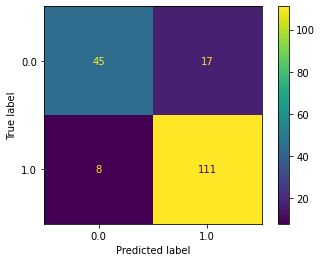

In [208]:
print(confusion_matrix(test_npz[:,-1] ,predict))
disp = ConfusionMatrixDisplay(confusion_matrix(test_npz[:,-1],predict), display_labels=clf_dtree.classes_ )
disp.plot()

[[ 45  17]
 [  7 112]]


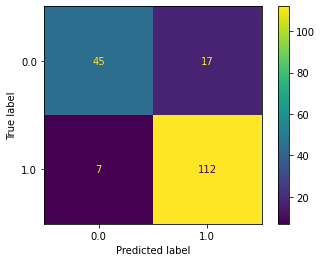

In [209]:
print(confusion_matrix(test_npz[:,-1] ,lgr_predict))
disp = ConfusionMatrixDisplay(confusion_matrix(test_npz[:,-1],lgr_predict), display_labels=lgr.classes_ )
disp.plot()

In [210]:
print(classification_report(test_npz[:,-1] ,predict))
print("\n",classification_report(test_npz[:,-1] ,lgr_predict))

              precision    recall  f1-score   support

         0.0       0.85      0.73      0.78        62
         1.0       0.87      0.93      0.90       119

    accuracy                           0.86       181
   macro avg       0.86      0.83      0.84       181
weighted avg       0.86      0.86      0.86       181


               precision    recall  f1-score   support

         0.0       0.87      0.73      0.79        62
         1.0       0.87      0.94      0.90       119

    accuracy                           0.87       181
   macro avg       0.87      0.83      0.85       181
weighted avg       0.87      0.87      0.86       181



In [211]:
print("test Accuracy: ",accuracy_score(test_npz[:,-1] ,predict))
print("train Accuracy: ", accuracy_score(train_npz[:,-1], train_pred))
print("\ntest Accuracy: ",accuracy_score(test_npz[:,-1] ,lgr_predict))
print("train Accuracy: ", accuracy_score(train_npz[:,-1], lgr_train_predict))

test Accuracy:  0.861878453038674
train Accuracy:  0.9320388349514563

test Accuracy:  0.8674033149171271
train Accuracy:  0.8890429958391124


In [221]:
user_data = df[1:2]
df[1:2].values[:,:-1]

array([[2, 'sid', 9876544345, 'Noida', 'B7', 'Support', 'Male', 0.0,
        '< =1', 13.0, 'Marr.', 38.08, 'Direct', 'Promoted', 'No']],
      dtype=object)

In [249]:
target_train_df[:1]

df.iloc[:,-1]

0      Left
1      Stay
2      Stay
3      Stay
4      Stay
       ... 
897    Stay
898    Left
899    Left
900    Stay
901    Stay
Name: Stay/Left, Length: 902, dtype: object

In [253]:
df.iloc[:,:-1][897:900]

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match
897,898,Rahul,9876544345,Vijayawada,B1,Operation,Female,0.03,< =1,0.03,Single,21.09,Direct,Non Promoted,Yes
898,899,Rahul,9876544345,Vijayawada,B1,Operation,Female,0.03,< =1,0.03,Single,22.02,Direct,Non Promoted,Yes
899,900,Rahul,9876544345,Vijayawada,B1,Operation,Female,0.03,< =1,0.03,Single,22.01,Direct,Non Promoted,NaN


In [256]:
userData = preprocessing.transform(df.iloc[:,:-1][1:2])
clf_dtree.predict(userData)

array([1.])

In [259]:
lgr.predict(preprocessing.transform(df.iloc[:,:-1][895:906]))

array([1., 1., 1., 1., 1., 1., 0.])

## Model Factory logic

In [9]:
import yaml
import os, importlib
config_path = os.path.join('D:\DataScience-60\AttritionRatePredict\configs',"model.yaml")
with open(config_path, 'rb') as y:
    config_file = ConfigBox(yaml.safe_load(y))


In [10]:
def class_for_ref(module_name, class_name):
    module = importlib.import_module(module_name)
    class_ref = getattr(module, class_name)
    return class_ref

def update_property_of_class(instance_ref:object, property_data:dict):
    if not isinstance(property_data, dict):
        raise Exception("property data required for Dictionary")

    for key, val in property_data.items():
        setattr(instance_ref, key, val)
    return instance_ref

In [23]:
print(config_file.keys())
# print(config_file['model_selection']['module_0'])
# print(config_file['grid_search']['params'])
print(config_file.grid_search)
print(config_file.grid_search['class'])
import time
import datetime
type(time)
type(datetime.datetime.now())

dict_keys(['grid_search', 'model_selection'])
{'class': 'GridSearchCV', 'module': 'sklearn.model_selection', 'params': {'cv': 5, 'verbose': 2}}
GridSearchCV


datetime.datetime

In [70]:
for model_sr in config_file['model_selection'].keys():
    module = config_file['model_selection'][model_sr]
    print(module['module'],"\n")
    
    if 'params' in module:
        print(module['params'])
    if 'search_param_grid' in module:
        print(module['search_param_grid'])
    print(module['module'])

sklearn.linear_model 

{'fit_intercept': True}
{'fit_intercept': [True, False]}
sklearn.linear_model
sklearn.ensemble 

{'min_samples_leaf': 3}
{'min_sample_leaf': [6]}
sklearn.ensemble


In [56]:
module_name = config_file['grid_search']['module']
class_name = config_file['grid_search']['class']
params = config_file['grid_search']['params']
grid_search = class_for_ref(module_name, class_name)

config_file['model_selection']['module_0']['module']
config_file['model_selection']['module_0']['class']
class_model = class_for_ref(config_file['model_selection']['module_0']['module'], config_file['model_selection']['module_0']['class'])
print(class_model)
print(grid_search)

<class 'sklearn.linear_model._logistic.LogisticRegression'>
<class 'sklearn.model_selection._search.GridSearchCV'>


In [41]:
grid_search

sklearn.model_selection._search.GridSearchCV

In [51]:
cv = grid_search(estimator=class_model(), param_grid=params)


In [54]:
instance_ref = cv
property_data = config_file['grid_search']['params']

print(update_property_of_class(instance_ref, dict()))

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'cv': 5, 'verbose': 2}, verbose=2)


In [55]:
from sklearn.model_selection import GridSearchCV
GridSearchCV()

## Remaining

In [72]:
len(numerical), len(categorical)

(5, 10)

In [75]:
df.shape

(902, 16)

In [108]:
X = df[features_cols]
y = df[target_col]
y = y.map(lambda x: 1 if x=='Stay' else 0)
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [40]:
for t in tt_split:
    print(t.shape)

(721, 17)
(181, 17)


In [49]:
tt_split[1].to_csv("train_test_train.csv", index=False)

In [44]:
df['Age in Years'] = pd.cut(df['Age in YY.'], bins=[0.0, 1.5, 3, np.inf], labels= [0, 1, 2])

In [45]:
df.shape

(902, 17)

In [46]:
for train, test in split.split(df, df['Age in Years']):
    strat_train = df.loc[train].drop(['Age in Years'],axis=1)
    print(strat_train.shape, len(train))
    strat_test = df.loc[test].drop(['Age in Years'], axis=1)
    print(strat_test.shape, len(test))

(721, 16) 721
(181, 16) 181


In [32]:
strat_test.to_csv("strat_test.csv", index=False)

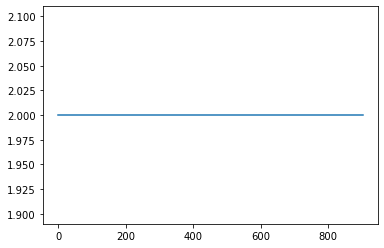

In [24]:
plt.plot(pd.cut(df['Age in YY.'], bins=[0.0, 1.5, 3, np.inf], labels= [0, 1, 2]))

In [12]:
df['Age in YY.'].min()

21.05

In [44]:
df.isna().sum()

table id                 0
name                     0
phone number             0
Location                 0
Emp. Group               0
Function                 0
Gender                   0
Tenure                   0
Tenure Grp.              0
Experience (YY.MM)       4
Marital Status           0
Age in YY.               0
Hiring Source            0
Promoted/Non Promoted    0
Job Role Match           2
Stay/Left                0
dtype: int64

In [54]:
df.dropna(axis=0, inplace=True)

In [55]:
df.isna().sum()

table id                 0
name                     0
phone number             0
Location                 0
Emp. Group               0
Function                 0
Gender                   0
Tenure                   0
Tenure Grp.              0
Experience (YY.MM)       0
Marital Status           0
Age in YY.               0
Hiring Source            0
Promoted/Non Promoted    0
Job Role Match           0
Stay/Left                0
dtype: int64

In [45]:
df['Job Role Match'].unique()

array(['Yes', 'No', nan], dtype=object)

In [46]:
df['Job Role Match'].value_counts()

Yes    482
No     418
Name: Job Role Match, dtype: int64

In [47]:
df.dropna()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,897,Rahul,9876544345,Vijayawada,B1,Operation,Male,0.03,< =1,0.03,Single,24.06,Direct,Non Promoted,Yes,Stay
897,898,Rahul,9876544345,Vijayawada,B1,Operation,Female,0.03,< =1,0.03,Single,21.09,Direct,Non Promoted,Yes,Stay
898,899,Rahul,9876544345,Vijayawada,B1,Operation,Female,0.03,< =1,0.03,Single,22.02,Direct,Non Promoted,Yes,Left
900,901,Rahul,9876544345,Vijayawada,B1,Operation,Female,0.03,< =1,0.03,Single,22.02,Direct,Non Promoted,Yes,Stay


In [48]:
df.isnull().sum()

table id                 0
name                     0
phone number             0
Location                 0
Emp. Group               0
Function                 0
Gender                   0
Tenure                   0
Tenure Grp.              0
Experience (YY.MM)       4
Marital Status           0
Age in YY.               0
Hiring Source            0
Promoted/Non Promoted    0
Job Role Match           2
Stay/Left                0
dtype: int64

In [49]:
def mapping(x):
    x = None
    for i in df['Job Role Match']:
        if i != "Yes" and i != "No":
            x = 'Yes'
    return x

In [50]:
for i in df['Job Role Match']:
    if i != "Yes" and i != "No":
        print(i)
        print(type(i))
        print(type(np.nan))
    

nan
<class 'float'>
<class 'float'>
nan
<class 'float'>
<class 'float'>


In [51]:
df['Job Role Match'].value_counts()

Yes    482
No     418
Name: Job Role Match, dtype: int64

In [52]:
df['Job Role Match'].replace(np.nan,'Yes')

0      Yes
1       No
2      Yes
3      Yes
4      Yes
      ... 
897    Yes
898    Yes
899    Yes
900    Yes
901     No
Name: Job Role Match, Length: 902, dtype: object

In [53]:
df['Job Role Match'].unique()

array(['Yes', 'No', nan], dtype=object)

In [59]:
for col in df.columns:
    if df[col].dtype == object:
        print(col,":",df[col].unique())
        print(df[col].value_counts())
        print(">>>>>>>>>.-------.<<<<<<<< \n")

name : ['sid' 'shruti' 'Dwane' 'Arnab' 'Papu' 'Shiv' 'Rahul']
Arnab     309
Papu      201
Dwane     153
Shiv      127
shruti     74
sid        19
Rahul      13
Name: name, dtype: int64
>>>>>>>>>.-------.<<<<<<<< 

Location : ['Pune' 'Noida' 'Bangalore' 'Lucknow' 'Chennai' 'Hyderabad' 'Nagpur'
 'Madurai' 'Mumbai' 'Gurgaon' 'Kolkata' 'Vijayawada']
Chennai       255
Noida         236
Bangalore     210
Hyderabad      62
Pune           56
Madurai        29
Lucknow        20
Nagpur         14
Vijayawada      6
Mumbai          4
Gurgaon         3
Kolkata         1
Name: Location, dtype: int64
>>>>>>>>>.-------.<<<<<<<< 

Emp. Group : ['B2' 'B7' 'B3' 'B1' 'B5' 'B0' 'B4' 'B6' 'C3' 'D2']
B1    537
B2    276
B3     59
B0      8
B4      7
B5      4
B7      2
B6      1
C3      1
D2      1
Name: Emp. Group, dtype: int64
>>>>>>>>>.-------.<<<<<<<< 

Function : ['Operation' 'Support' 'Sales']
Operation    832
Support       52
Sales         12
Name: Function, dtype: int64
>>>>>>>>>.-------.<<<<<<<< 

G

In [65]:
location_dict_new = {
    'Chennai':       7,
    'Noida':         6,
    'Bangalore':     5,
    'Hyderabad':     4,
    'Pune':          3,
    'Madurai':       2,
    'Lucknow':       1,
    'other place':   0,
}

def location(x):
    if str(x) in location_dict_new.keys():
        return location_dict_new[str(x)]
    else:
        return location_dict_new['other place']
    
data_1 = df['Location'].apply(location)
df['New Location'] = data_1
df.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left,3
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay,6
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay,5
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay,6
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay,1


In [66]:
df['New Location'].value_counts()

7    255
6    236
5    210
4     62
3     56
2     29
0     28
1     20
Name: New Location, dtype: int64

In [67]:
pd.get_dummies(df['Function'])

,Operation,Sales,Support
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
896,1,0,0
897,1,0,0
898,1,0,0
900,1,0,0


In [68]:
pd.get_dummies(df["Hiring Source"])

,Agency,Direct,Employee Referral
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
896,0,1,0
897,0,1,0
898,0,1,0
900,0,1,0


In [75]:
Maritial_dict = df['Marital Status'].value_counts()

In [76]:
def Mar(x):
    if str(x) in Maritial_dict  and Maritial_dict[str(x)] > 100:
        return x 
    else:
        return "other status"

In [69]:
df.columns

Index(['table id', 'name', 'phone number', 'Location', 'Emp. Group',
       'Function', 'Gender ', 'Tenure', 'Tenure Grp.', 'Experience (YY.MM)',
       'Marital Status', 'Age in YY.', 'Hiring Source',
       'Promoted/Non Promoted', 'Job Role Match', 'Stay/Left', 'New Location'],
      dtype='object')

In [73]:
df['Marital Status'].value_counts().keys()

Index(['Single', 'Marr.', 'Div.', 'NTBD', 'Sep.'], dtype='object')

In [74]:
df['Marital Status'].value_counts()

Single    534
Marr.     356
Div.        2
NTBD        2
Sep.        2
Name: Marital Status, dtype: int64

In [77]:
df['New Marital']= df['Marital Status'].apply(Mar)
df.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location,New Marital
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left,3,Single
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay,6,Marr.
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay,5,Marr.
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay,6,Marr.
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay,1,Marr.


In [78]:
df['New Marital'].value_counts()

Single          534
Marr.           356
other status      6
Name: New Marital, dtype: int64

In [83]:
def promo(x):
    if x == "Promoted":
        return int(1)
    else:
        return int(0)
df['New Promotion'] = df["Promoted/Non Promoted"].apply(promo)

In [84]:
df.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location,New Marital,New Promotion
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left,3,Single,0
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay,6,Marr.,1
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay,5,Marr.,1
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay,6,Marr.,1
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay,1,Marr.,0


In [86]:
df['Emp. Group'].value_counts()

B1    537
B2    276
B3     59
B0      8
B4      7
B5      4
B7      2
B6      1
C3      1
D2      1
Name: Emp. Group, dtype: int64

In [87]:
emp_dict_new = {
    'B1': 4,
    'B2': 3,
    'B3': 2,
    'other group': 1,    
}


def emp(x):
    if str(x) in emp_dict_new.keys():
        return str(x)
    else:
        return "other group"
    
df['New EMP']= df["Emp. Group"].apply(emp)
df.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location,New Marital,New Promotion,New EMP
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left,3,Single,0,B2
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay,6,Marr.,1,other group
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay,5,Marr.,1,B3
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay,6,Marr.,1,B2
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay,1,Marr.,0,B2


In [88]:
def job(x):
    if x == "Yes":
        return int(1)
    else:
        return int(0)
    
df['New Job Role Match'] = df['Job Role Match'].apply(job)
df.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),...,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location,New Marital,New Promotion,New EMP,New Job Role Match
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,...,27.12,Direct,Non Promoted,Yes,Left,3,Single,0,B2,1
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,...,38.08,Direct,Promoted,No,Stay,6,Marr.,1,other group,0
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,...,36.04,Direct,Promoted,Yes,Stay,5,Marr.,1,B3,1
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,...,32.07,Direct,Promoted,Yes,Stay,6,Marr.,1,B2,1
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,...,32.05,Direct,Non Promoted,Yes,Stay,1,Marr.,0,B2,1


In [90]:
df['Gender '].value_counts()

Male      656
Female    234
other       6
Name: Gender , dtype: int64

In [91]:
df.columns

Index(['table id', 'name', 'phone number', 'Location', 'Emp. Group',
       'Function', 'Gender ', 'Tenure', 'Tenure Grp.', 'Experience (YY.MM)',
       'Marital Status', 'Age in YY.', 'Hiring Source',
       'Promoted/Non Promoted', 'Job Role Match', 'Stay/Left', 'New Location',
       'New Marital', 'New Promotion', 'New EMP', 'New Job Role Match'],
      dtype='object')

In [93]:
for col in df.columns:
    if df[col].dtype == object:
        print(col)

name
Location
Emp. Group
Function
Gender 
Tenure Grp.
Marital Status
Hiring Source
Promoted/Non Promoted
Job Role Match
Stay/Left
New Marital
New EMP


In [95]:
# name_dummy = pd.get_dummies(df['name'])
tenure_grp_dummy = pd.get_dummies(df['Tenure Grp.'])
gender_dummy = pd.get_dummies(df['Gender '])
marit_dummy = pd.get_dummies(df['New Marital'])
func_dummy = pd.get_dummies(df['Function'])
hiring_source_dummy = pd.get_dummies(df['Hiring Source'])
emp_dummy = pd.get_dummies(df['New EMP'])

In [96]:
df1 = pd.concat([df, tenure_grp_dummy,gender_dummy, marit_dummy,
                func_dummy, hiring_source_dummy,
                emp_dummy,], axis=1)

In [97]:
df1.shape

(896, 39)

In [99]:
for col in df1:
    if df1[col].dtype != object:
        print( col )

table id
phone number
Tenure
Experience (YY.MM)
Age in YY.
New Location
New Promotion
New Job Role Match
< =1
> 1 & < =3
Female
Male
other
Marr.
Single
other status
Operation
Sales
Support
Agency
Direct
Employee Referral
B1
B2
B3
other group


In [101]:
df1.drop(["table id", "name", "Marital Status","Promoted/Non Promoted","Function","Emp. Group","Job Role Match","Location"
              ,"Hiring Source","Gender ", 'Tenure','New Marital', 'New EMP'],axis=1,inplace=True)

In [102]:
df1.shape

(896, 26)

In [107]:
df1['Stay/Left'].value_counts()

Stay    592
Left    304
Name: Stay/Left, dtype: int64

In [108]:
def target(x):
    if x == "Stay":
        return int(1)
    else:
        return int(0)

In [109]:
df1['target'] = df1['Stay/Left'].apply(target)

In [131]:
df1.drop(['Tenure Grp.'], axis=1, inplace=True)

In [112]:
df1.drop(['Stay/Left'], axis=1, inplace=True)

In [132]:
df1.to_csv("processed_table.csv")

In [133]:
df2 = pd.read_csv('processed_table.csv')

In [134]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          896 non-null    int64  
 1   phone number        896 non-null    int64  
 2   Experience (YY.MM)  896 non-null    float64
 3   Age in YY.          896 non-null    float64
 4   New Location        896 non-null    int64  
 5   New Promotion       896 non-null    int64  
 6   New Job Role Match  896 non-null    int64  
 7   < =1                896 non-null    int64  
 8   > 1 & < =3          896 non-null    int64  
 9   Female              896 non-null    int64  
 10  Male                896 non-null    int64  
 11  other               896 non-null    int64  
 12  Marr.               896 non-null    int64  
 13  Single              896 non-null    int64  
 14  other status        896 non-null    int64  
 15  Operation           896 non-null    int64  
 16  Sales   

In [135]:
X = df2.drop('target', axis=1)
y = df2['target']

In [117]:
from sklearn.model_selection import train_test_split

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)

In [137]:
X_train.shape

(716, 25)

In [138]:
y_train.shape

(716,)

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score

In [125]:
logReg = LogisticRegression(C=0.1, solver='liblinear')
DecTree = DecisionTreeClassifier()
RF = RandomForestClassifier()
GausNB = GaussianNB()

In [143]:
for model, name in zip([logReg, DecTree, RF, GausNB],
               ['LogisticRegression', 'DecisionTree','RandomForest','GaussianNB']):
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_accu = accuracy_score(y_train,train_pred)
    test_accu = accuracy_score(y_test, test_pred)
    train_msg = "[%s] training accuracy: %f" % (name, train_accu)
    test_msg = "[%s] testing accuracy: %f" % (name, test_accu)
    print(train_msg)
    print(test_msg)

[LogisticRegression] training accuracy: 0.662011
[LogisticRegression] testing accuracy: 0.655556
[DecisionTree] training accuracy: 1.000000
[DecisionTree] testing accuracy: 0.855556
[RandomForest] training accuracy: 1.000000
[RandomForest] testing accuracy: 0.883333
[GaussianNB] training accuracy: 0.877095
[GaussianNB] testing accuracy: 0.811111


In [148]:
model = logReg.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

0.6555555555555556


In [150]:
import pickle

model = logReg.fit(X_train, y_train)
file = 'evaluated_model.pkl'
pickle.dump(model, open(file, "wb"))

In [155]:
with open('evaluated_model.pkl', 'rb') as file:
    evail_model = pickle.load(file)

In [154]:
test_s = X_train.iloc[10:11,:].values

In [166]:
for i in range(len(X_train)):
    if evail_model.predict(X_train.iloc[i:i+1,:])[0] == 0:
        print("hello")

In [158]:
evail_model.predict(test_s)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [162]:
y_train

385    1
215    0
399    1
411    0
354    1
      ..
360    0
709    0
439    1
174    0
122    1
Name: target, Length: 716, dtype: int64

In [168]:
import sklearn
sklearn.__version__

'1.0.2'